In [46]:
from keras_retinanet.preprocessing.csv_generator import CSVGenerator
import keras_retinanet
from keras_retinanet import models
import keras

from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

from archive import archive_training_history
from visualisations import plot_results

from keras_retinanet.utils.eval import evaluate

import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

## Build the model 

In [3]:
mymodel = models.backbone('resnet50').retinanet(num_classes = 1)

## Compile the Model 

In [4]:
mymodel.compile(
    loss={
        'regression'    : keras_retinanet.losses.smooth_l1(),
        'classification': keras_retinanet.losses.focal()
    },
    optimizer=keras.optimizers.adam(lr=1e-5, clipnorm=0.001)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Build the Generator

In [7]:
mygenerator = CSVGenerator("images/training_data.csv", "images/class_IDs.csv", base_dir = '')

## Train the Model

In [8]:
history = mymodel.fit_generator(mygenerator, epochs = 10, shuffle = True)


Epoch 1/10
13/13 [==============================] - 172s 13s/step - loss: 37520.1779 - regression_loss: 268.0121 - classification_loss: 37252.1641
Epoch 2/10
13/13 [==============================] - 170s 13s/step - loss: 34814.3373 - regression_loss: 78.4465 - classification_loss: 34735.8906
Epoch 3/10
13/13 [==============================] - 163s 13s/step - loss: 9175.4513 - regression_loss: 62.2236 - classification_loss: 9113.2285
Epoch 4/10
13/13 [==============================] - 164s 13s/step - loss: 319.6405 - regression_loss: 41.7807 - classification_loss: 277.8598
Epoch 5/10
13/13 [==============================] - 162s 12s/step - loss: 61.9968 - regression_loss: 35.7659 - classification_loss: 26.2309
Epoch 6/10
13/13 [==============================] - 170s 13s/step - loss: 35.5520 - regression_loss: 27.8280 - classification_loss: 7.7240
Epoch 7/10
13/13 [==============================] - 169s 13s/step - loss: 28.4165 - regression_loss: 24.8359 - classification_loss: 3.5806
Ep

In [9]:
archive_training_history(history.history, 'initial_history')

## Visualise training

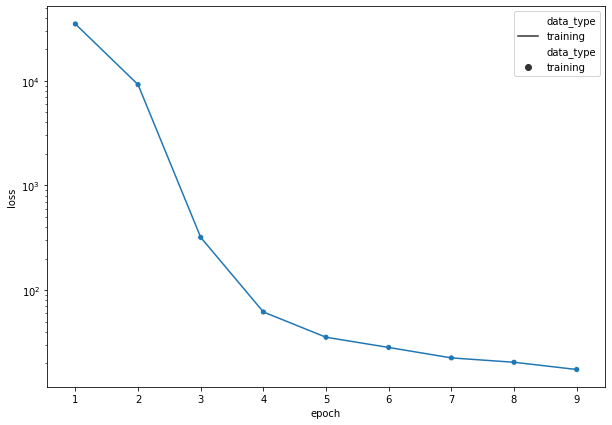

In [28]:
plot_results('results/initial_history.txt')
plt.yscale('log')

## Convert to an inference model

In [18]:
# First save the h5 model to file. 
mymodel.save_weights('mytrained/connor_trained.h5')


In [22]:
# Then convert the model using the provided arguments. 
my_model_inference = models.convert_model(mymodel)

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


## Visualise Results

processing time:  3.480790138244629


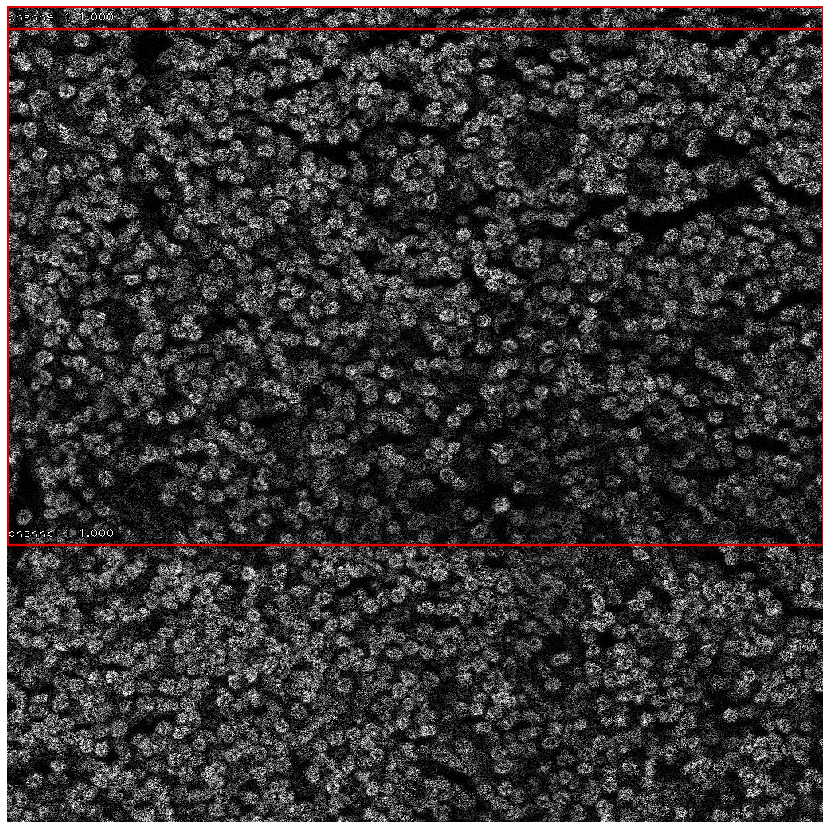

In [30]:
labels_to_names = {0: 'channel 1'}

# load image
image = read_image_bgr('images/channel_0_img18.tif')

draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# # preprocess image for network
# image = preprocess_image(image)
# image, scale = resize_image(image)

# # process image
start = time.time()
boxes, scores, labels = my_model_inference.predict_on_batch(np.expand_dims(image, axis=0))

print("processing time: ", time.time() - start)


# correct for image scale
# boxes /= scale

# visualize detections
for box, score in zip(boxes[0], scores[0]):
    # scores are sorted so we can break
#     if score < 0.5:
#         break
    color = label_color(3)
    
    b = box.astype(int)
    draw_box(draw, b, color=[225, 0, 0])

    caption = "{} {:.3f}".format(labels_to_names[0], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [33]:
c_model =models.backbone('resnet50').retinanet(num_classes = 1)

In [35]:
c_model.load_weights('mytrained/caitlin_trained.h5')

In [36]:
c_model_inference = models.convert_model(c_model)

tracking <tf.Variable 'Variable_5:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_6:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_7:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_8:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_9:0' shape=(9, 4) dtype=float32> anchors


In [48]:
evaluate(mygenerator, c_model_inference, save_path = "results/")

Running network: 100% (13 of 13) |#######| Elapsed Time: 0:00:31 Time:  0:00:31
Parsing annotations: 100% (13 of 13) |###| Elapsed Time: 0:00:00 Time:  0:00:00


{0: (0.0, 5540.0)}